In [25]:
import numpy as np
import pandas as pd
from scipy import optimize
from scifit.solvers import FitSolver1D

In [2]:
class Catenoid(FitSolver1D):
    @staticmethod
    def model(x, a, b):
        return a * np.cosh((x[:, 0] - b) / a)

In [3]:
p = (-1, 2)

In [4]:
model = Catenoid()

In [5]:
data = model.synthetic_dataset(
    xmin=-1, xmax=5, resolution=120,
    parameters=p,
    sigma=0.001, scale_mode="auto", seed=1234
)

In [6]:
sol = model.fit(data, p0=(-1, 1))

In [7]:
levels = [6, 6.5, 7, 8, 8.475, 8.5, 9, 10, 11, 12]
domains = pd.DataFrame({"min": [-2, 1], "max": [3, 3]}).T

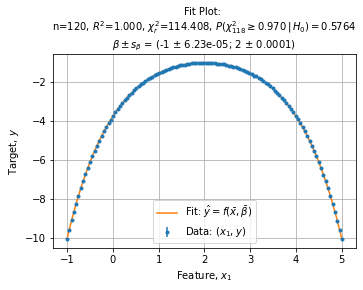

In [8]:
axe = model.plot_fit()
axe.figure.savefig("figures/NonLinear/CosHyperbolicTwoPolesFit.pdf")

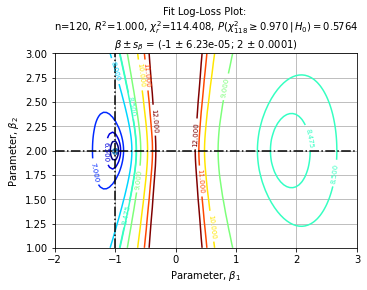

In [9]:
axe = model.plot_loss(domains=domains, levels=levels, log_loss=True)
axe.figure.savefig("figures/NonLinear/CosHyperbolicTwoPolesLoss.pdf")

In [10]:
sol = model.fit(data)

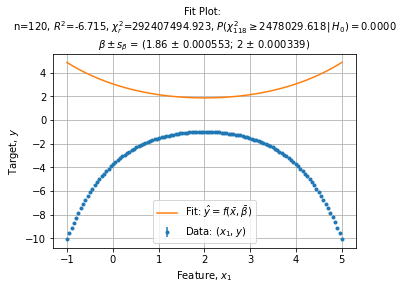

In [11]:
axe = model.plot_fit()
axe.figure.savefig("figures/NonLinear/CosHyperbolicTwoPolesFitBad.pdf")

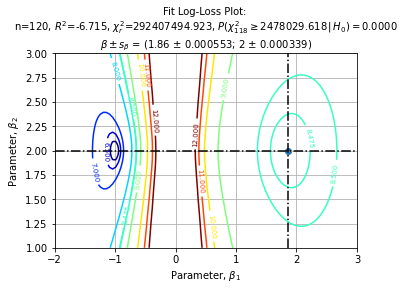

In [12]:
axe = model.plot_loss(domains=domains, levels=levels, log_loss=True)
axe.figure.savefig("figures/NonLinear/CosHyperbolicTwoPolesLossBad.pdf")

In [13]:
class Catenoid2(FitSolver1D):
    @staticmethod
    def model(x, a, b, c):
        return a * np.cosh((x[:, 0] - b) / c)

In [17]:
model2 = Catenoid2()
sol2 = model2.fit(data)

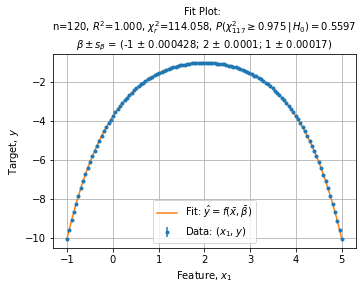

In [19]:
axe = model2.plot_fit()

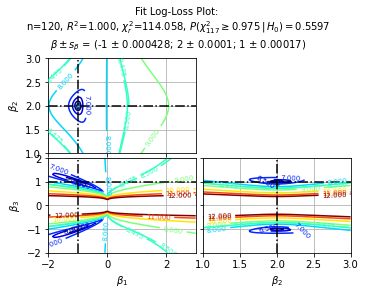

In [24]:
axe = model2.plot_loss(domains=pd.DataFrame({"min": [-2, 1, -2], "max": [3, 3, 2]}).T, levels=levels, log_loss=True)

In [26]:
def model(x, a, x0):
    return a*np.cosh((x - x0)/a)

In [36]:
def loss_factory(x, y):
    def wrapped(beta):
        return np.sum(np.power(y - model(x, beta[0], beta[1]), 2))
    return wrapped

In [41]:
x = np.linspace(-1, 5, 120)
y = model(x, a=-1, x0=2)

In [42]:
loss = loss_factory(x, y)

In [43]:
# Find local minimum (not optimal), beta=[ 1.857e+00  2.000e+00]
optimize.minimize(loss, x0=[1, 1])

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 6010.284849472104
        x: [ 1.857e+00  2.000e+00]
      nit: 11
      jac: [ 6.104e-05  0.000e+00]
 hess_inv: [[ 4.290e-04 -4.327e-04]
            [-4.327e-04  6.778e-04]]
     nfev: 159
     njev: 49

In [44]:
# Find global optimum, beta=[-1.000e+00  2.000e+00]
optimize.basinhopping(loss, x0=[1, 1])

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 3.3710425664664833e-13
                          x: [-1.000e+00  2.000e+00]
                        nit: 100
      minimization_failures: 29
                       nfev: 6501
                       njev: 2068
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 3.3710425664664833e-13
                                    x: [-1.000e+00  2.000e+00]
                                  nit: 7
                                  jac: [ 7.797e-06  2.056e-06]
                             hess_inv: [[ 9.587e-05  9.383e-07]
                                        [ 9.383e-07  2.454e-04]]
                                 nfev: 36
                                 njev: 12